# The Relative Age Effect in professional biathlon
This jupyter notebook, developed in synch with a R markdown notebook where the Bayesian hypothesis test part of the code is written, is born with the aim of studying the relative age effetc (RAE) in biathlon.
The first section takes into consideration a large set of countries taking part in the word cup while the second is focused on the 3 more represented nations.

In [1]:
import wikipedia
from bs4 import BeautifulSoup
import re
import pandas as pd
import glob
import numpy as np
from googlesearch import search
import urllib
from datetime import datetime
import calendar
from functools import reduce
import matplotlib.pyplot as plt
from copy import copy
import matplotlib as mpl
import glob
import json
import seaborn as sns 
from sklearn import linear_model
from matplotlib import colors
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle
import matplotlib
from matplotlib.ticker import FuncFormatter

In [33]:
# Reading the files
file_list = glob.glob('data_RAE/athletes/athletes*')

In [34]:
pd.read_csv('data_RAE/athletes/athletes_1990-1991.txt', sep='\t').head()

,No,Family Name,Given Name,Nation,Races,World CupRank,Rank(avg),Points(avg),Wins,2nd,...,Podiums,Top5s,Top10s,Top20s,Top30s,Top40s,>40,LAP,DNF,DSQ
0,1,Kirchner,Mark,GER,14,2.0,9.1,15.9,4,0,...,6,7,10,13,13,13,1,0,0,0
1,2,Tchepikov,Sergei,URS,12,1.0,8.9,16.5,3,1,...,4,8,8,11,11,12,0,0,0,0
2,3,Luck,Frank,GER,10,4.0,9.3,16.0,1,3,...,4,5,7,9,9,10,0,0,0,0
3,4,Carrara,Pieralberto,ITA,13,5.0,21.0,10.6,1,1,...,3,4,5,8,9,11,2,0,0,0
4,5,Tarasov,Sergei Sen.,URS,10,10.0,10.6,11.4,1,1,...,2,3,6,7,9,9,0,0,0,1


In [35]:
#show_files
file_list[:5]

['data_RAE/athletes/athletes_1991-1992_w.txt',
 'data_RAE/athletes/athletes_2010-2011.txt',
 'data_RAE/athletes/athletes_1997-1998_w.txt',
 'data_RAE/athletes/athletes_2010-2011_w.txt',
 'data_RAE/athletes/athletes_1998-1999_w.txt']

In [36]:
# Function to convert plain text files to csv
def replace_func(str):
    return str.replace('\t', ',')

In [37]:
# Creation of the DataFrame
with open(file_list[0], mode = 'r') as f:
    # Creation of the columns for the Data Frame 
    columns = f.readlines(1)[0][:-1].split('\t')
    
athletes_df = pd.DataFrame(columns=columns)


for file in file_list:
    df = pd.read_csv(file, sep='\t')


    pattern = '[0-9]+-[0-9]+'
    season = re.findall(pattern=pattern,  string=file)
    
    season, = season
    df['Season'] = season

    if '_w' in file:
        df['sex'] = np.array(['women']*len(df))
    else:
        df['sex'] = np.array(['men']*len(df))

    athletes_df = pd.concat([athletes_df, df], axis = 0)


athletes_df['full_name'] = athletes_df['Given Name'] + ' ' + athletes_df['Family\xa0Name'] 


athletes_df = athletes_df[athletes_df['Points(avg)'] > 0]

athletes_df.loc[athletes_df['full_name']=="Anfisa Restzova", 'full_name'] = 'Anfisa Reztsova'
athletes_df.loc[athletes_df['full_name']=="Sergei Sen. Tarasov", 'full_name'] = 'Sergei Tarasov'
athletes_df.loc[athletes_df['full_name']=="Frode Loeberg", 'full_name'] = 'Frode Løberg'
athletes_df.loc[athletes_df['full_name']=="Valeri Kirienko", 'full_name'] = 'Valeri Kiriyenko'
athletes_df.loc[athletes_df['full_name']=="Michael Dixon", 'full_name'] = 'Mike Dixon'
athletes_df.loc[athletes_df['full_name']=="Antero Laehde", 'full_name'] = 'Antero Lähde'
athletes_df.loc[athletes_df['full_name']=="Peter Sjoeden", 'full_name'] = 'Peter Sjödén'
athletes_df.loc[athletes_df['full_name']=="Krasimir Vidinov", 'full_name'] = 'Krasimir Videnov'
athletes_df.loc[athletes_df['full_name']=="Spas Slatev", 'full_name'] = 'Spas Zlatev'
athletes_df.loc[athletes_df['full_name']=="Bruno Hofstaetter", 'full_name'] = 'Bruno Hofstätter'
athletes_df.loc[athletes_df['full_name']=="Walter Hoerl", 'full_name'] = 'Walter Hörl'
athletes_df.loc[athletes_df['full_name']=="Sakis Tsakiris", 'full_name'] = 'Atanasios Tsakiris'
athletes_df.loc[athletes_df['full_name']=="Hristo Vodenicharov", 'full_name'] = 'Khristo Vodenicharov'
athletes_df.loc[athletes_df['full_name']=="Yong-Woon Kim", 'full_name'] = 'Kim Yong-woon'
athletes_df.loc[athletes_df['full_name']=="Grete I. Nykelmo", 'full_name'] = 'Grete Ingeborg Nykkelmo'
athletes_df.loc[athletes_df['full_name']=="Anne Linn Elvebakk", 'full_name'] = 'Anne Elvebakk'
athletes_df.loc[athletes_df['full_name']=="Synnoeve Thoresen", 'full_name'] = 'Synnøve Thoresen'
athletes_df.loc[athletes_df['full_name']=="Alexandr Loginov", 'full_name'] = 'Alexander Loginov'

athletes_df.head()

,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,2nd,...,Rank(avg),Points(avg),Season,sex,Unnamed: 20,√No,World Cup\nRank,Rank\n(avg),Points\n(avg),full_name
0,1,Restzova,Anfisa,EUN,12,NaN,NaN,NaN,5,1,...,5.1,20.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Anfisa Reztsova
1,2,Harvey,Antje,GER,11,NaN,NaN,NaN,2,2,...,10.2,12.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Antje Harvey
2,3,Petcherskaia,Svetlana,EUN,13,NaN,NaN,NaN,1,1,...,10.7,13.1,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Svetlana Petcherskaia
3,4,Kristiansen,Elin,NOR,9,NaN,NaN,NaN,1,0,...,9.1,14.6,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Elin Kristiansen
4,5,Pelcova,Jirina,TCH,9,NaN,NaN,NaN,1,0,...,11.1,12.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Jirina Pelcova


In [38]:
# Resetting the index
athletes_df.reset_index(inplace=True, drop=True)

In [39]:
# Creating the Data Frame of the athletes of the first season
first_seas_df = athletes_df[athletes_df['Season'] == '1990-1991']
first_seas_df.reset_index(inplace=True, drop=True)
first_seas_df.head()

,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,2nd,...,Rank(avg),Points(avg),Season,sex,Unnamed: 20,√No,World Cup\nRank,Rank\n(avg),Points\n(avg),full_name
0,1,Kirchner,Mark,GER,14,NaN,NaN,NaN,4,0,...,9.1,15.9,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Mark Kirchner
1,2,Tchepikov,Sergei,URS,12,NaN,NaN,NaN,3,1,...,8.9,16.5,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Sergei Tchepikov
2,3,Luck,Frank,GER,10,NaN,NaN,NaN,1,3,...,9.3,16.0,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Frank Luck
3,4,Carrara,Pieralberto,ITA,13,NaN,NaN,NaN,1,1,...,21.0,10.6,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Pieralberto Carrara
4,5,Tarasov,Sergei Sen.,URS,10,NaN,NaN,NaN,1,1,...,10.6,11.4,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Sergei Tarasov


In [40]:
# Function to look for english wikipedia urls
def look_for_wiki(str):
    return 'en.wikipedia' in str

In [41]:
# Converting a string to date time
def str_to_date(str):
    return datetime.strptime(str, '%Y-%m-%d').date()

In [42]:
# Creating the dictionary connecting month numbers to month names
months = list(calendar.month_name)[1:]
mon_numb = ['0' + str(i) for i in range(1, 10)] + [str(i) for i in range(10, 13)]
month_dict = {months[i]: mon_numb[i] for i in (np.arange(len(months)))}

In [43]:
# Creating the function that helps us in case of disambiguation
def look_for(str):
    return 'biathlete' in str or 'biathlon' in str

In [44]:
# Converting string dates with format '30 January 1999' to format 'Y-m-d'
def convert_date(str):
    splitted_str = str.split(' ')
    if len(splitted_str[0]) == 2:
        return str[-4:] + '-' + month_dict[str[3:-5]] + '-' + str[:2]
    else:
        return str[-4:] + '-' + month_dict[str[2:-5]] + '-' + '0' + str[:1]

In [45]:
#Not using a proper error definition in the except because of the wikipedia package handling of errors

# Definition of the function that parses the birth dates 
def birthday(name, season):
    ref_dob = season[:4]
    ref_date_str = str(int(ref_dob) - 25) + '-' + '01' + '-' '01'
    ref_date = str_to_date(ref_date_str)
    
    if name == 'Anatoli Zhdanovitch':
        return '1961-12-23'
    elif name == 'Natallia Prakharenka':
        return '1967-05-04'
    elif name == 'Christophe Vassallo':
        return '1968-07-07'
    elif name == 'Christof Vodenitscharov':
        return '1966-11-20'
    elif name == 'Hubert Esterl':
        return '1970-01-01'
    elif name == 'Ismo Mäkinen':
        return '1968-03-06'
    elif name == 'Richard Oliver':
        return '1961-03-14'
    elif name == 'Tatsuharu Toyama':
        return '1967-02-04'
    elif name == 'Marius Beyeler':
        return '1963-06-22'
    elif name == 'Hirohide Sato':
        return '1960-04-17'
    
    else:
        try:
            try:
                html = wikipedia.WikipediaPage(name).html()

            except:
            
                searches = wikipedia.search(name)
                mask = list(map(look_for, searches))
                
                

                if len(np.array(searches)[np.array(mask)]) > 0:
                    id = np.array(searches)[np.array(mask)][0]
                    html = wikipedia.WikipediaPage(id).html()
                else:
                    try:
                        wikipedia.set_lang('de')
                        html = wikipedia.WikipediaPage(name).html()
                        wikipedia.set_lang('en')
                    except:
                        try:
                            wikipedia.set_lang('pl')
                            html = wikipedia.WikipediaPage(name).html()
                            wikipedia.set_lang('en')
                        except:
                            wikipedia.set_lang('fr')
                            html = wikipedia.WikipediaPage(name).html()
                            wikipedia.set_lang('en')
        except:
            
            wikipedia.set_lang('en')
            searches = np.array(list(search(name, stop = 10, lang='en')))
            
            
            # Decode from utf-8
            
            if len(searches[np.array(list(map(look_for_wiki, searches)))]) > 0:
                final_search = searches[np.array(list(map(look_for_wiki, searches)))][0]
                
                plain_search = urllib.parse.unquote(final_search)
                
                page_title = plain_search.split("/wiki/")[1]
                
                try:
                    html = wikipedia.WikipediaPage(page_title).html()
                except:
                    wiki_search = wikipedia.search(page_title)
                    wiki_mask = list(map(look_for, wiki_search))
                    if len(np.array(wiki_search)[np.array(wiki_mask)]) > 0:
                        wiki_id = np.array(wiki_search)[np.array(wiki_mask)][0]
                        html = wikipedia.WikipediaPage(wiki_id).html()
                    else: return 'no-wiki'
            else:
                return 'no-wiki'
        
        soup = BeautifulSoup(html, 'html.parser')
        indiatable=soup.find('span',{'class':"bday"})
        indiatable = str(indiatable)

        pattern = '\d{4}-\d{2}-\d{2}'

        if len(re.findall(pattern, indiatable)) > 0:
        
            dob_list = re.findall(pattern, indiatable)
            
            final_date = dob_list[0] 

            
            return final_date
            

        else:
            
            pattern = '\d{4}-\d{2}-\d{2}|\d{1,2} [[A-Za-z]+ \d{4}'
            dob_list = re.findall(pattern, html)
            

            if len(dob_list) > 0:
                
                dob_list_date = []

                for dob in dob_list:
                    try:
                        date = convert_date(dob)
                        date = str_to_date(date)
                        
                        dob_list_date.append(date)
                    except KeyError:
                        date = str_to_date('1900-01-01')
                        dob_list_date.append(date)


                dist_from_ref = np.abs(np.array(dob_list_date) - ref_date)
                
                idx_min = np.argmin(dist_from_ref)

                final_date = dob_list_date[idx_min]
                
                
                return final_date
            
             
                
            else:
                
                
                return 'no_app_date'

In [46]:
first_seas_df = pd.read_csv('/Users/tommaso/Desktop/BiathlonAzzurro/RAE/data_RAE/first_season.csv')
first_seas_df.head()

,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,2nd,...,Points(avg),Season,sex,Unnamed: 20,√No,World Cup\nRank,Rank\n(avg),Points\n(avg),full_name,DOB
0,1,Kirchner,Mark,GER,14,NaN,NaN,NaN,4,0,...,15.9,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Mark Kirchner,too_old_young
1,2,Tchepikov,Sergei,URS,12,NaN,NaN,NaN,3,1,...,16.5,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Sergei Tchepikov,1967-01-30
2,3,Luck,Frank,GER,10,NaN,NaN,NaN,1,3,...,16.0,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Frank Luck,1967-12-05
3,4,Carrara,Pieralberto,ITA,13,NaN,NaN,NaN,1,1,...,10.6,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Pieralberto Carrara,1966-02-14
4,5,Tarasov,Sergei Sen.,URS,10,NaN,NaN,NaN,1,1,...,11.4,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Sergei Tarasov,1965-02-15


In [47]:
# Defining the finction that eliminates records with an inconsistent parsed age
def inconsistent(df):

    for i in range(len((df['DOB']))):
        tmp = df['DOB'][i]
        if type(tmp) == str:
            try:
                tmp = str_to_date(tmp)
                if (tmp > str_to_date(str(int(df['Season'][i][:4])-15) + '-' + '01' + '-' + '01')) or (tmp < str_to_date(str(int(df['Season'][i][:4])-45) + '-' + '01' + '-' + '01')):
                    
                    df['DOB'] = df['DOB'].replace([str(tmp)], 'too_old_young') 
                else:
                    df['DOB'] = df['DOB'].replace(str(tmp), tmp)
            except ValueError:
                pass
        else:
            pass
    return df

first_seas_df = inconsistent(first_seas_df)
first_seas_df.head()

,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,2nd,...,Points(avg),Season,sex,Unnamed: 20,√No,World Cup\nRank,Rank\n(avg),Points\n(avg),full_name,DOB
0,1,Kirchner,Mark,GER,14,NaN,NaN,NaN,4,0,...,15.9,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Mark Kirchner,too_old_young
1,2,Tchepikov,Sergei,URS,12,NaN,NaN,NaN,3,1,...,16.5,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Sergei Tchepikov,1967-01-30
2,3,Luck,Frank,GER,10,NaN,NaN,NaN,1,3,...,16.0,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Frank Luck,1967-12-05
3,4,Carrara,Pieralberto,ITA,13,NaN,NaN,NaN,1,1,...,10.6,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Pieralberto Carrara,1966-02-14
4,5,Tarasov,Sergei Sen.,URS,10,NaN,NaN,NaN,1,1,...,11.4,1990-1991,men,NaN,NaN,NaN,NaN,NaN,Sergei Tarasov,1965-02-15


In [48]:
# Finding the youngest athlete in the 1990-1991 season
youngest = np.max(first_seas_df[np.array([type(i) != str for i in first_seas_df['DOB']])].DOB)
print('1990-1991 season youngest competitor date of birth: ', youngest)

1990-1991 season youngest competitor date of birth:  1973-09-08


In [49]:
unique_names_df = athletes_df.groupby('full_name').agg(lambda x: x)
unique_names_df.head(2)

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1561/458575938.py:1: FutureWarning: ['World CupRank', 'Rank(avg)', 'Points(avg)', 'Unnamed: 20', '√No', 'World Cup\nRank', 'Rank\n(avg)', 'Points\n(avg)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  unique_names_df = athletes_df.groupby('full_name').agg(lambda x: x)


,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,2nd,...,Top10s,Top20s,Top30s,Top40s,>40,LAP,DNF,DSQ,Season,sex
full_name,,,,,,,,,,,,,,,,,,,,,
Adam Runnalls,"[81, 95]","[Runnalls, Runnalls]","[Adam, Adam]","[CAN, CAN]","[11, 17]","[nan, nan]","[nan, nan]","[nan, nan]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[1, 0]","[5, 1]","[6, 16]","[0, 0]","[0, 0]","[0, 0]","[2021-2022, 2020-2021]","[men, men]"
Adam Vaclavik,"[74, 64, 69, 98]","[Vaclavik, Vaclavik, Vaclavik, Vaclavik]","[Adam, Adam, Adam, Adam]","[CZE, CZE, CZE, CZE]","[18, 17, 10, 11]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]","[0, 0, 0, 0]",...,"[0, 0, 0, 0]","[0, 1, 0, 0]","[5, 1, 2, 0]","[8, 5, 3, 1]","[10, 12, 7, 10]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[2021-2022, 2016-2017, 2019-2020, 2017-2018]","[men, men, men, men]"


In [50]:
# Vector of all unique names
all_names = np.sort(np.array(athletes_df['full_name'].unique()))

In [51]:
athletes_DOB = pd.read_csv('data_RAE/athletes_DOB.csv', header = None, index_col=0)
athletes_DOB.head()

,1
0,
Adam Runnalls,1998-10-03
Adam Vaclavik,1994-02-18
Adina Sotropa,1969-08-19
Agata Suszka,1971-09-27
Agnieszka Cyl,1900-01-01


In [52]:
# Linking each name to the parsed date
athletes_dict = athletes_DOB.to_dict(orient = 'index')

In [53]:
# Creating the state of the art dictionary
dob_dict = reduce(lambda x, y: {**x, **y}, list(map(lambda x: {x:athletes_dict[x][1]}, athletes_dict)))

In [54]:
# Correcting two romaninan and russian pathologies
athletes_df[athletes_df['Nation'] == 'ROM'] = 'ROU'
athletes_df[athletes_df['Nation'] == 'OAR'] = 'RUS'

In [55]:
# Creating the date of birth column
athletes_df['DOB'] = athletes_df['full_name'].map(dob_dict)
athletes_df.head()

,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,2nd,...,Points(avg),Season,sex,Unnamed: 20,√No,World Cup\nRank,Rank\n(avg),Points\n(avg),full_name,DOB
0,1,Restzova,Anfisa,EUN,12,NaN,NaN,NaN,5,1,...,20.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Anfisa Reztsova,1964-12-16
1,2,Harvey,Antje,GER,11,NaN,NaN,NaN,2,2,...,12.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Antje Harvey,1985-01-11
2,3,Petcherskaia,Svetlana,EUN,13,NaN,NaN,NaN,1,1,...,13.1,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Svetlana Petcherskaia,1968-11-14
3,4,Kristiansen,Elin,NOR,9,NaN,NaN,NaN,1,0,...,14.6,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Elin Kristiansen,1968-07-09
4,5,Pelcova,Jirina,TCH,9,NaN,NaN,NaN,1,0,...,12.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Jirina Pelcova,1900-01-01


In [56]:
# Resetting the index
athletes_df.reset_index(inplace=True)

In [57]:
# Removing inconsistent date of birsths
athletes_df = inconsistent(athletes_df)
athletes_df.head()

,index,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,...,Points(avg),Season,sex,Unnamed: 20,√No,World Cup\nRank,Rank\n(avg),Points\n(avg),full_name,DOB
0,0,1,Restzova,Anfisa,EUN,12,NaN,NaN,NaN,5,...,20.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Anfisa Reztsova,1964-12-16
1,1,2,Harvey,Antje,GER,11,NaN,NaN,NaN,2,...,12.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Antje Harvey,too_old_young
2,2,3,Petcherskaia,Svetlana,EUN,13,NaN,NaN,NaN,1,...,13.1,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Svetlana Petcherskaia,1968-11-14
3,3,4,Kristiansen,Elin,NOR,9,NaN,NaN,NaN,1,...,14.6,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Elin Kristiansen,1968-07-09
4,4,5,Pelcova,Jirina,TCH,9,NaN,NaN,NaN,1,...,12.8,1991-1992,women,NaN,NaN,NaN,NaN,NaN,Jirina Pelcova,too_old_young


In [58]:
athletes_df.DOB = athletes_df.DOB.astype(str)

In [59]:
def filtering_func(str):
    pattern = '\d{4}-\d{2}-\d{2}'
    filt_list = re.findall(pattern, str)
    if len(filt_list) == 1:
        return True
    else:
        return False

In [60]:
# Reducing to a data frame with all date types
final_df = athletes_df[list(map(filtering_func, athletes_df.DOB))]

final_df.loc[:,'DOB'] = pd.to_datetime(final_df.DOB, format = '%Y-%m-%d')

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1561/4020581344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,'DOB'] = pd.to_datetime(final_df.DOB, format = '%Y-%m-%d')


In [61]:
youngest_all = np.max(final_df.DOB)
print('The date of birth of the youngest biathlete in the data set is: ', youngest_all)

The date of birth of the youngest biathlete in the data set is:  2002-05-25 00:00:00


In [62]:
# Selecting only athletes oldest than the youngest contestant in the 1990-1991 season
final_df = final_df[final_df.DOB > pd.to_datetime(str(youngest), format = '%Y-%m-%d')]
final_df.head()

,index,No,Family Name,Given Name,Nation,Races,"""World CupRank""","""Rank(avg)""","""Points(avg)""",Wins,...,Points(avg),Season,sex,Unnamed: 20,√No,World Cup\nRank,Rank\n(avg),Points\n(avg),full_name,DOB
78,78,1,Svendsen,Emil Hegle,NOR,24,NaN,NaN,NaN,8,...,46.0,2010-2011,men,NaN,NaN,NaN,NaN,NaN,Emil Hegle Svendsen,1985-07-12
79,79,2,Boe,Tarjei,NOR,26,NaN,NaN,NaN,5,...,42.7,2010-2011,men,NaN,NaN,NaN,NaN,NaN,Tarjei Boe,1988-07-29
80,80,3,Fourcade,Martin,FRA,26,NaN,NaN,NaN,3,...,38.1,2010-2011,men,NaN,NaN,NaN,NaN,NaN,Martin Fourcade,1988-09-14
81,81,4,Ferry,Bjoern,SWE,22,NaN,NaN,NaN,2,...,26.4,2010-2011,men,NaN,NaN,NaN,NaN,NaN,Bjoern Ferry,1978-08-01
82,82,5,Peiffer,Arnd,GER,23,NaN,NaN,NaN,2,...,30.6,2010-2011,men,NaN,NaN,NaN,NaN,NaN,Arnd Peiffer,1987-03-18


In [63]:
# Athlete-Nation data frame
ath_nat = final_df[['full_name', 'Nation']]
ath_nat.head()

,full_name,Nation
78,Emil Hegle Svendsen,NOR
79,Tarjei Boe,NOR
80,Martin Fourcade,FRA
81,Bjoern Ferry,SWE
82,Arnd Peiffer,GER


In [64]:
# Counting the names of unique athletes
ath_nat.drop_duplicates(inplace=True)
counts_per_ath = ath_nat.groupby('Nation').count().rename(columns={'full_name':'Counts'})
counts_per_ath.sort_values('Counts', ascending = False, inplace = True)
counts_per_ath.head()

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1561/2589322524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath_nat.drop_duplicates(inplace=True)


,Counts
Nation,
RUS,51
NOR,42
GER,38
BLR,33
UKR,32


In [65]:
# Primary and secondary colors dictionary
colors_dict = {'RUS':['blue', 'red'], 'NOR':['firebrick', 'mediumblue'], 'GER':['black', 'gold'],
'BLR':['red', 'forestgreen'], 'UKR':['deepskyblue', 'darkkhaki'], 'SWE':['dodgerblue', 'gold'], 'FRA':['darkblue', 'darkblue'],
'ITA':['dodgerblue', 'dodgerblue'],'CZE':['royalblue', 'red'],'FIN':['white', 'mediumblue'],'CAN':['red', 'white'],
'SVK':['red', 'blue'],'KAZ':['skyblue', 'khaki'],'POL':['white', 'orangered'], 'SUI':['white', 'red'],'AUT':['firebrick', 'white'],
'JPN':['white', 'firebrick'],'SLO':['blue', 'white'],'USA':['firebrick', 'navy'],'EST':['black', 'steelblue'],'BUL':['darkgreen', 'red'],
'LAT':['brown', 'white'],'ROU':['blue', 'gold'], 'LTU':['forestgreen', 'gold'], 'CHN':['red', 'yellow'], 'MDA':['mediumblue', 'orangered'],
'BEL':['black', 'gold'], 'KOR':['white', 'firebrick'], 'CRO':['white', 'red'], 'GBR':['navy', 'red'], 'AUS':['gold', 'gold'], 
'ARM':['blue', 'gold'], 'SRB':['white', 'midnightblue'], 'ESP':['red', 'yellow'],
  'NZL':['black', 'white'], 'AND':['mediumblue', 'gold']}

In [66]:
# Adding the colors
counts_per_ath['primary_color'] = counts_per_ath.index.map(colors_dict)
counts_per_ath['secondary_color'] = counts_per_ath.apply(lambda x: x.primary_color[-1], axis=1)
counts_per_ath['primary_color'] = counts_per_ath.apply(lambda x: x.primary_color[0], axis=1)

counts_per_ath.head()

,Counts,primary_color,secondary_color
Nation,,,
RUS,51,blue,red
NOR,42,firebrick,mediumblue
GER,38,black,gold
BLR,33,red,forestgreen
UKR,32,deepskyblue,darkkhaki


/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1561/737787207.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts_per_ath.index, rotation=90, weight='bold', size=12)


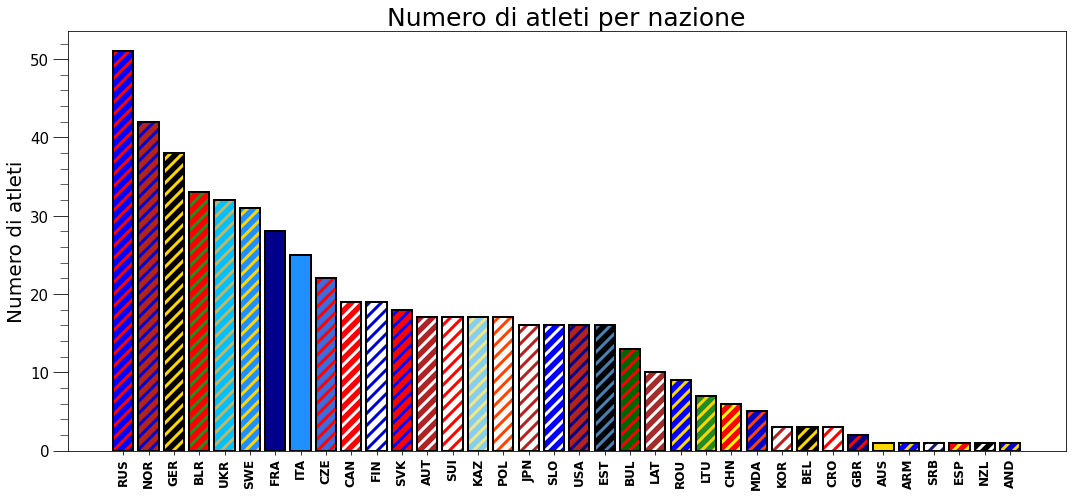

In [67]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(15, 7))
ax.bar(x = counts_per_ath.index, height = counts_per_ath['Counts'], edgecolor='black')
#ax.set_xticklabels(counts_per_ath.index, rotation=90, ha='center')
for bar, main_color, hatch_color in zip(ax.containers[0], counts_per_ath['primary_color'], counts_per_ath['secondary_color']):
    rect = copy(bar)
    rect.set_facecolor('none')
    rect.set_edgecolor('black')
    rect.set_linewidth(2)
    ax.add_patch(rect)
    bar.set_facecolor(main_color)
    bar.set_edgecolor(hatch_color)
    bar.set_hatch('//')
    
    
    ax.tick_params(axis='y', which='major', labelsize=15, length=15)
    ax.tick_params(axis='y', which='minor', labelsize=15, length=8)
    ax.minorticks_on()
    mpl.rcParams['hatch.linewidth'] = 3
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_title('Numero di atleti per nazione', fontsize = 25)
    ax.set_ylabel('Numero di atleti', fontsize = 20)
    ax.set_xticklabels(counts_per_ath.index, rotation=90, weight='bold', size=12)

fig.tight_layout()
plt.savefig('my_fig.png', dpi= 72 * 10)

In the plot above we can see how Russia was tha Country which featured the most different athletes, followed by Norway and Germany.

In [68]:
# Countries analyzed
elegible_countries = ['NOR', 'FRA', 'FIN', 'CAN',  'JPN', 'SWE', 'ITA', 'RUS', 'UKR', 'BLR', 
 'CZE', 'POL', 'EST', 'BUL', 'KAZ', 'LAT', 'SLO', 'USA', 'CRO', 'BEL', 'LTU']
elegible_dict = {'NOR': 1, 'FIN':1, 'CAN':1, 'JPN':4, 'SWE':1, 'FRA':1, 'ITA':1, 'RUS':1, 'UKR':1, 'BLR':1, 
 'CZE':1, 'POL':1, 'EST':1, 'BUL':1, 'KAZ': 1, 'LAT':1, 'SLO':1, 'USA':9, 'BEL':1, 'CRO':1, 'LTU':1}

In [69]:
ath_nat_dict = reduce(lambda x, y: {**x, **y}, list(map(lambda x: {x['full_name']:x['Nation']}, ath_nat.to_dict(orient='records'))))

In [70]:
elegible_df = ath_nat[np.in1d(ath_nat.Nation, elegible_countries)].groupby('full_name').count()
elegible_df['full_name'] = elegible_df.index
elegible_df.reset_index(inplace=True, drop=True)
elegible_df['DOB'] = elegible_df.full_name.map(dob_dict)
elegible_df.drop('Nation', inplace = True, axis=1)
elegible_df['Nation'] = elegible_df.full_name.map(ath_nat_dict)
elegible_df.head()

,full_name,DOB,Nation
0,Adam Runnalls,1998-10-03,CAN
1,Adam Vaclavik,1994-02-18,CZE
2,Ahti Toivanen,1990-01-05,FIN
3,Albina Akhatova,1976-11-13,RUS
4,Aleksander Fjeld Andersen,1997-04-15,NOR


In [71]:
# Adding the column of the cut-off month
elegible_df['cut-off'] = elegible_df['Nation'].map(elegible_dict)
elegible_df.head()

,full_name,DOB,Nation,cut-off
0,Adam Runnalls,1998-10-03,CAN,1.0
1,Adam Vaclavik,1994-02-18,CZE,1.0
2,Ahti Toivanen,1990-01-05,FIN,1.0
3,Albina Akhatova,1976-11-13,RUS,1.0
4,Aleksander Fjeld Andersen,1997-04-15,NOR,1.0


In [72]:
# Function to create the relative age column
def app(month, cut):
    if month-cut > 0:
        return month-cut
    elif month-cut == 0:
        return 0
    else:
        return 12 + month-cut

In [73]:
elegible_df['DOB'] = elegible_df.full_name.map(dob_dict)
elegible_df['month'] = elegible_df.apply(lambda x: pd.to_datetime(x.DOB, format = '%Y-%m-%d').month,
 axis=1)

In [74]:
elegible_df['relative_month'] = elegible_df.apply(lambda x: app(pd.to_datetime(x.DOB, format = '%Y-%m-%d').month ,
 x['cut-off']), axis=1)
elegible_df.head()

,full_name,DOB,Nation,cut-off,month,relative_month
0,Adam Runnalls,1998-10-03,CAN,1.0,10,9.0
1,Adam Vaclavik,1994-02-18,CZE,1.0,2,1.0
2,Ahti Toivanen,1990-01-05,FIN,1.0,1,0.0
3,Albina Akhatova,1976-11-13,RUS,1.0,11,10.0
4,Aleksander Fjeld Andersen,1997-04-15,NOR,1.0,4,3.0


In [75]:
elegible_df['year'] = elegible_df.apply(lambda x: pd.to_datetime(x.DOB, format = '%Y-%m-%d').year,
axis=1)

In [76]:
# Defining and printing the numbers of birth among athletes in the first and in the last trimester
print(tot_counts := sum(elegible_df.groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts))
print(first_six_num := sum(elegible_df.groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts[0:2]))
print(second_six_num := sum(elegible_df.groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts[9:]))

424
118
96


In [77]:
ax.containers

[<BarContainer object of 36 artists>]

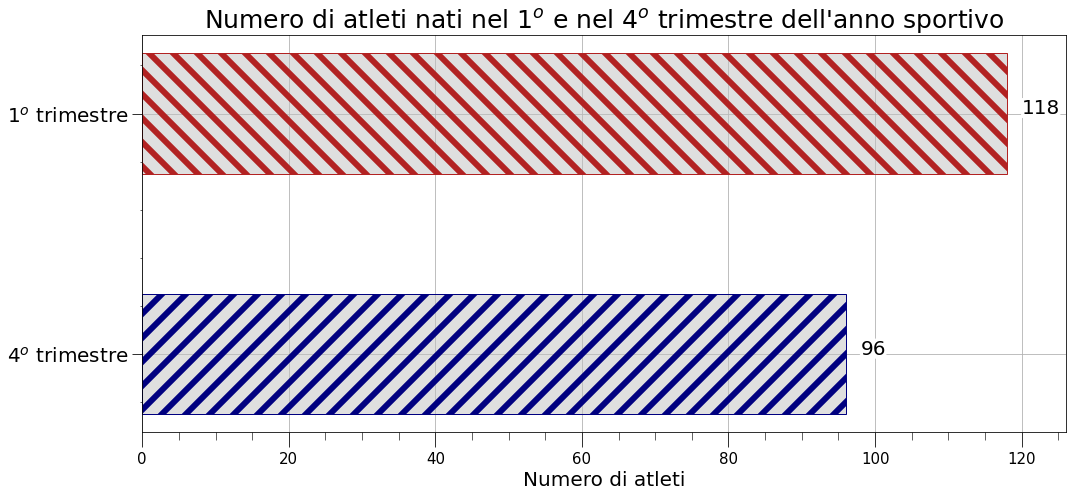

In [91]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(15, 7))
ax.grid(zorder = 1)
ax.barh(y=['$4^{o}$ trimestre', '$1^{o}$ trimestre'], width = [second_six_num, first_six_num], \
    zorder = 2, height=0.5)
ax.tick_params(axis='x', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='major', labelsize=20, length=10)
ax.tick_params(axis='x', which='minor', labelsize=15, length=8)
ax.minorticks_on()
ax.set_xlabel('Numero di atleti', fontsize = 20)
ax.tick_params(axis='y', which='minor', bottom=False)
bar_1, bar_2 =  ax.containers[0]
fc = colors.to_rgba('silver')
fc = fc[:-1] + (0.5,)
bar_1.set_facecolor(fc)
bar_2.set_facecolor(fc)
bar_1.set_hatch('/')
bar_2.set_hatch('\\')
bar_1.set_edgecolor('navy')
bar_2.set_edgecolor('firebrick')
mpl.rcParams['hatch.linewidth'] = 6
ax.text(first_six_num + 2, 1, f'{first_six_num}', fontsize = 20, \
    bbox=dict(facecolor='white', edgecolor= 'white', boxstyle='round, pad=0'),\
        zorder = 2)
ax.text(second_six_num + 2, 0, f'{second_six_num}', fontsize = 20, \
    bbox=dict(facecolor='white', edgecolor= 'white', boxstyle='round, pad=0'),\
        zorder = 2)
ax.set_xlim(right = 126)
ax.set_title('Numero di atleti nati nel $1^o$ e nel $4^o$ trimestre dell\'anno sportivo', \
    fontsize = 25)
fig.tight_layout()


In [47]:
# Defining the final df for the elite countries
final_df_top = elegible_df[np.in1d(elegible_df.Nation, np.array(['NOR', 'RUS', 'BLR']))]

In [48]:
print(tot_counts_top := sum(final_df_top.groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts))
print(first_six_top := sum(final_df_top.groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts[0:2]))
print(second_six_top := sum(final_df_top.groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts[9:]))


119
31
21


/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1630/4225974539.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plt.yticks()[0], rotation=0, weight='bold', size=17)


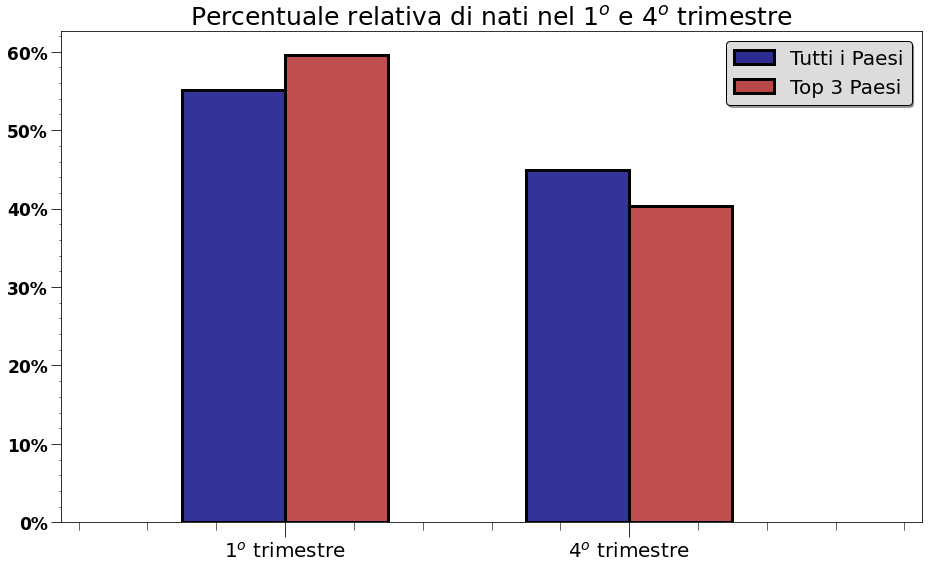

In [49]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(13, 8))
import matplotlib.ticker as mtick
x_loc = np.array([1, 2])
heights_1 = [100*first_six_num/(first_six_num + second_six_num),  
 100*second_six_num/(first_six_num + second_six_num)] 
heights_2 =  [100*first_six_top/(first_six_top + second_six_top),\
    100*second_six_top/(first_six_top + second_six_top)]
width = 0.3
fc_1 = colors.to_rgba('navy')
fc_1 = fc_1[:-1] + (0.8,)
ax.bar(x = x_loc, height= heights_1, width=width, edgecolor='black', linewidth=3,\
    color=fc_1, label = 'Tutti i Paesi')
fc_2 = colors.to_rgba('firebrick')
fc_2 = fc_2[:-1] + (0.8,)

legend_fc = colors.to_rgba('gainsboro')
legend_fc = legend_fc[:-1] + (0.3,)
ax.bar(x = x_loc + width, height= heights_2, width=width, edgecolor='black', linewidth=3,\
    color=fc_2, label = 'Top 3 Paesi')
ax.tick_params(axis='x', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='major', labelsize=20, length=10)
ax.tick_params(axis='x', which='minor', labelsize=15, length=8)
ax.minorticks_on()
ax.set_yticklabels(plt.yticks()[0], rotation=0, weight='bold', size=17)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='y', which='minor', bottom=False)
ax.set_xlim(left = 0.5, right = 3)
ax.set_xticks([1 + width/2, 2 + width/2])
ax.set_xticklabels(['$1^o$ trimestre', '$4^o$ trimestre'], size=20)


ax.legend(fontsize = 20, facecolor=legend_fc, edgecolor='black', shadow = True)

#ax.set_yticklabels(yticks, rotation=0, weight='bold', size=12)
ax.set_title('Percentuale relativa di nati nel $1^o$ e $4^o$ trimestre', \
    fontsize = 25)
fig.tight_layout()


In [50]:
print(heights_1, heights_2)

[55.14018691588785, 44.85981308411215] [59.61538461538461, 40.38461538461539]


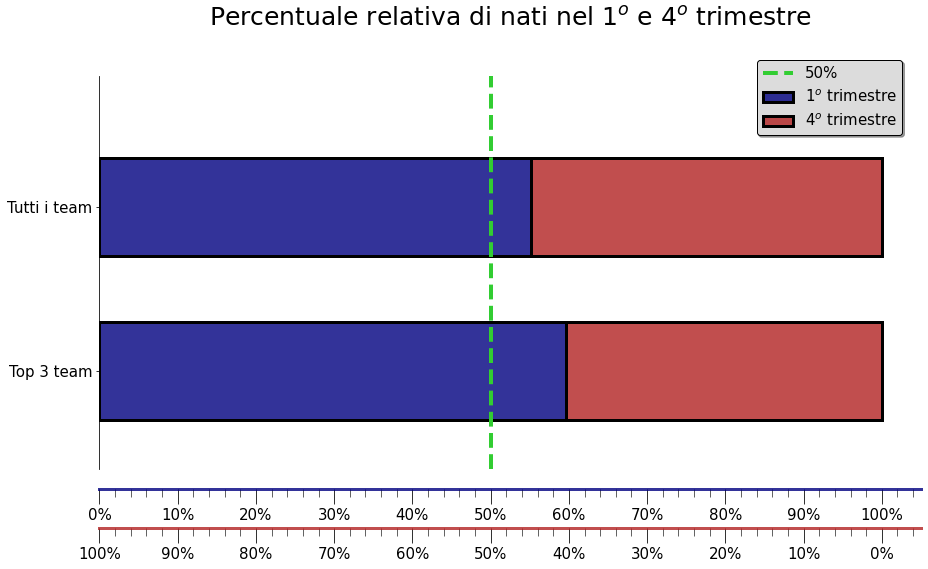

In [53]:



fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(13, 8))
fig.subplots_adjust(bottom=0.2)



heights_1 = [100*first_six_num/(first_six_num + second_six_num),\
     100*first_six_top/(first_six_top + second_six_top)]
heights_2 = [100*second_six_num/(first_six_num + second_six_num),\
     100*second_six_top/(first_six_top + second_six_top)]

fc_1 = colors.to_rgba('navy')
fc_1 = fc_1[:-1] + (0.8,)
fc_2 = colors.to_rgba('firebrick')
fc_2 = fc_2[:-1] + (0.8,)

height = 0.3
secx = ax.secondary_xaxis(-0.15)
ax.barh(y = [1.5, 1], width = heights_1, height = height, color=fc_1, left = 0,\
     edgecolor='black', linewidth=3, label = '$1^o$ trimestre')
ax.barh(y = [1.5, 1], width = heights_2, height = height, left = heights_1, color=fc_2,\
     edgecolor='black', linewidth=3, label = '$4^o$ trimestre')

ax.set_ylim(bottom = 0.7, top = 1.9)

ax.axvline(50, linewidth=4, linestyle = '--', color= 'limegreen', zorder = 2, label = '50%')

ax.set_title('Percentuale relativa di nati nel $1^o$ e $4^o$ trimestre', \
    fontsize = 25, pad = 50)



ax.spines["bottom"].set_position(("axes", -0.05))
ax.spines["bottom"].set_edgecolor(fc_1)
ax.spines["bottom"].set_linewidth(3)
ax.set_xticks(range(0, 101, 10))
ax.tick_params(axis='x', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.tick_params(axis='x', which='minor', labelsize=15, length=8)
ax.minorticks_on()
ax.tick_params(axis='y', which='minor', left=False)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks(np.array([1, 1.5]))
ax.set_yticklabels(np.array(['Top 3 team', 'Tutti i team']))

secx.spines["bottom"].set_linewidth(3)
secx.set_xticks(range(0, 101, 10))
secx.set_xticklabels([f'{i}%' for i in range(0, 101, 10)[::-1]])
secx.spines["bottom"].set_edgecolor(fc_2)
secx.tick_params(axis='x', which='major', labelsize=15, length=15)
secx.tick_params(axis='x', which='minor', labelsize=15, length=8)
secx.minorticks_on()

legend_fc = colors.to_rgba('gainsboro')
legend_fc = legend_fc[:-1] + (0.1,)
ax.legend(fontsize = 15, facecolor=legend_fc, edgecolor='black', shadow = True, loc = [0.8, 0.85])
fig.tight_layout()



In [52]:
print(heights_1, heights_2)

[55.14018691588785, 59.61538461538461] [44.85981308411215, 40.38461538461539]


### Checking the distribution of the newborns

In [54]:
with open('data_RAE/UNdata_nations/UNdata_norway.csv', mode = 'r') as f:
    header = f.readlines(1)[0].split(',')

In [55]:
births_df = pd.DataFrame(columns = header)
for file in glob.glob('data_RAE/UNdata_nations/*'):
    df = pd.read_csv(file)
    births_df = pd.concat([births_df ,df])

In [56]:
births_df = births_df.iloc[:, 9:]
births_df.head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Norway,2021.0,Total,January - March,Data tabulated by year of occurrence,Provisional figure,2021.0,13726.0,NaN
1,Norway,2021.0,Total,April - June,Data tabulated by year of occurrence,Provisional figure,2021.0,14578.0,NaN
2,Norway,2021.0,Total,July - September,Data tabulated by year of occurrence,Provisional figure,2021.0,15165.0,NaN
3,Norway,2020.0,Total,Total,Data tabulated by year of occurrence,Provisional figure,2021.0,52984.0,NaN
4,Norway,2020.0,Total,January - March,Data tabulated by year of occurrence,Provisional figure,2020.0,13036.0,NaN


In [57]:
first_six = ['January - March', 'January', 'February', 'March']
second_six = ['October - December', 'October','November', 'December']

In [58]:
births_df = births_df[births_df.Month != 'Unknown']
births_df = births_df[births_df.Month != 'Total']
births_df.Month.unique()

array(['January - March', 'April - June', 'July - September',
       'October - December', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December'], dtype=object)

In [59]:
def rae_func(str):
    if str in first_six:
        return 'early_birth'
    elif str in second_six:
        return 'late_birth'
    else: return 'middle'

In [60]:
births_df['RAE'] = births_df.apply(lambda x: rae_func(x['Month']), axis=1)

In [61]:
youngest.year

1973

In [62]:
filtered_birth = births_df[births_df['Year'].between(youngest.year, youngest_all.year)]

In [63]:
early_birth_tot, late_birth_tot, middle_birth_tot = filtered_birth.groupby('RAE').Value.sum()
print('Percentage of early borns = ', early_birth_tot/(early_birth_tot + late_birth_tot))
print('Percentage of late borns = ', late_birth_tot/(early_birth_tot + late_birth_tot))

Percentage of early borns =  0.5054524205137669
Percentage of late borns =  0.49454757948623307


In [64]:
tot_years = filtered_birth.nunique().Year

In [65]:
#final_df.reset_index(inplace=True)
elegible_df.reset_index(inplace=True, drop=True)
elegible_df['year'] = elegible_df.apply(lambda x: pd.to_datetime(x.DOB, format = '%Y-%m-%d').year, 
axis=1)

In [66]:
def rae(month):
    if month < 4:
        return 'early'
    elif month > 9:
        return 'late' 
    else: return 'middle'

In [67]:
elegible_df['RAE'] = elegible_df.apply(lambda x: rae(x.relative_month), axis=1)
elegible_df.head()

,full_name,DOB,Nation,cut-off,month,relative_month,year,RAE
0,Adam Runnalls,1998-10-03,CAN,1.0,10,9.0,1998,middle
1,Adam Vaclavik,1994-02-18,CZE,1.0,2,1.0,1994,early
2,Ahti Toivanen,1990-01-05,FIN,1.0,1,0.0,1990,early
3,Albina Akhatova,1976-11-13,RUS,1.0,11,10.0,1976,late
4,Aleksander Fjeld Andersen,1997-04-15,NOR,1.0,4,3.0,1997,early


In [68]:
elegible_df.groupby(['year', 'RAE']).count().groupby('RAE').mean().full_name

RAE
early     5.592593
late      2.708333
middle    7.241379
Name: full_name, dtype: float64

In [69]:
early_mean, late_mean, _ = elegible_df.groupby(['year', 'RAE']).count().groupby('RAE').mean().full_name
early_mean_nor, late_mean_nor, _ = elegible_df[elegible_df['Nation'] == 'NOR']\
    .groupby(['year', 'RAE']).count().groupby('RAE').mean().full_name

In [70]:
early_std, late_std, _ = elegible_df.groupby(['year', 'RAE']).count().groupby('RAE').std().full_name
early_std_nor, late_std_nor, _ = elegible_df\
    [np.in1d(elegible_df.Nation, np.array(['NOR', 'RUS', 'BLR']))]\
    .groupby(['year', 'RAE']).count().groupby('RAE').std().full_name

In [71]:
summed_df = pd.DataFrame(births_df.groupby('RAE').sum().Value)['Value']
early = summed_df.early_birth/(summed_df.early_birth + summed_df.late_birth)
late = summed_df.late_birth/(summed_df.early_birth + summed_df.late_birth)

In [72]:
#tot_counts_nor = sum(elegible_df[elegible_df['Nation']=='NOR']\
#    .groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts)
#first_six_nor = sum(elegible_df[elegible_df['Nation']=='NOR']\
#    .groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts[0:4])
#second_six_nor = sum(elegible_df[elegible_df['Nation']=='NOR']\
#    .groupby('relative_month').count().rename(columns={'full_name':'Counts'}).Counts[8:])


In [73]:
inv_month_dict = dict((v, k) for k, v in month_dict.items())

In [74]:
elegible_df.loc[:,'month_lit'] = elegible_df.apply(lambda x: \
    inv_month_dict[(str(pd.to_datetime(x.DOB, format='%Y-%m-%d').month)\
    .zfill(2))], axis=1)

In [75]:
elegible_df.head()

,full_name,DOB,Nation,cut-off,month,relative_month,year,RAE,month_lit
0,Adam Runnalls,1998-10-03,CAN,1.0,10,9.0,1998,middle,October
1,Adam Vaclavik,1994-02-18,CZE,1.0,2,1.0,1994,early,February
2,Ahti Toivanen,1990-01-05,FIN,1.0,1,0.0,1990,early,January
3,Albina Akhatova,1976-11-13,RUS,1.0,11,10.0,1976,late,November
4,Aleksander Fjeld Andersen,1997-04-15,NOR,1.0,4,3.0,1997,early,April


In [76]:
final_df_el = final_df[np.in1d(final_df.Nation, elegible_countries)]

In [77]:
#final_df_nor = final_df[np.in1d(final_df.Nation, np.array(['NOR']))]
nor_podiums = pd.DataFrame(final_df_el.groupby('full_name').Podiums.sum())
nor_podiums['DOB'] = nor_podiums.index.map(dob_dict)

In [78]:
def bin_podiums(pod):
    if pod > 0:
        return 1
    else:
        return 0

In [79]:
nor_podiums['bin_podiums'] = nor_podiums.apply(lambda x: bin_podiums(x.Podiums), axis=1)

In [80]:
nor_podiums['month'] = nor_podiums.apply(lambda x: pd.to_datetime(x.DOB, format = '%Y-%m-%d').month,\
 axis=1)
nor_podiums.head()

,Podiums,DOB,bin_podiums,month
full_name,,,,
Adam Runnalls,0,1998-10-03,0,10
Adam Vaclavik,0,1994-02-18,0,2
Ahti Toivanen,0,1990-01-05,0,1
Albina Akhatova,20,1976-11-13,1,11
Aleksander Fjeld Andersen,0,1997-04-15,0,4


In [81]:
nor_podiums['full_name'] = nor_podiums.index

In [82]:
nor_podiums.reset_index(inplace = True, drop = True)
nor_podiums['Nation'] = nor_podiums.full_name.map(ath_nat_dict)
nor_podiums.head()

,Podiums,DOB,bin_podiums,month,full_name,Nation
0,0,1998-10-03,0,10,Adam Runnalls,CAN
1,0,1994-02-18,0,2,Adam Vaclavik,CZE
2,0,1990-01-05,0,1,Ahti Toivanen,FIN
3,20,1976-11-13,1,11,Albina Akhatova,RUS
4,0,1997-04-15,0,4,Aleksander Fjeld Andersen,NOR


In [83]:
nor_podiums['cut-off'] = nor_podiums['Nation'].map(elegible_dict)
nor_podiums.head()

,Podiums,DOB,bin_podiums,month,full_name,Nation,cut-off
0,0,1998-10-03,0,10,Adam Runnalls,CAN,1.0
1,0,1994-02-18,0,2,Adam Vaclavik,CZE,1.0
2,0,1990-01-05,0,1,Ahti Toivanen,FIN,1.0
3,20,1976-11-13,1,11,Albina Akhatova,RUS,1.0
4,0,1997-04-15,0,4,Aleksander Fjeld Andersen,NOR,1.0


In [84]:
nor_podiums['relative_month'] = nor_podiums.apply(lambda x: app(pd.to_datetime(x.DOB, format = '%Y-%m-%d')\
    .month ,x['cut-off']), axis=1)

In [85]:
def quadrimester(month):
    if month <= 3:
        return 1
    elif 4 <= month <= 9:
        return 2
    else: return 3
nor_podiums['trimester_1'] = nor_podiums.apply(lambda x: int(x.relative_month < 3), axis=1)
nor_podiums['trimester_2'] = nor_podiums.apply(lambda x: int(3 <= x.relative_month <= 5), axis=1)
nor_podiums['trimester_3'] = nor_podiums.apply(lambda x: int(6 <= x.relative_month <= 8), axis=1)
nor_podiums['trimester_4'] = nor_podiums.apply(lambda x: int(x.relative_month > 8), axis=1)

In [86]:
nor_podiums.head()

,Podiums,DOB,bin_podiums,month,full_name,Nation,cut-off,relative_month,trimester_1,trimester_2,trimester_3,trimester_4
0,0,1998-10-03,0,10,Adam Runnalls,CAN,1.0,9.0,0,0,0,1
1,0,1994-02-18,0,2,Adam Vaclavik,CZE,1.0,1.0,1,0,0,0
2,0,1990-01-05,0,1,Ahti Toivanen,FIN,1.0,0.0,1,0,0,0
3,20,1976-11-13,1,11,Albina Akhatova,RUS,1.0,10.0,0,0,0,1
4,0,1997-04-15,0,4,Aleksander Fjeld Andersen,NOR,1.0,3.0,0,1,0,0


In [87]:
analyze_data = {'tot_counts': {'tot_counts_num':tot_counts, 'tot_counts_nor':tot_counts_top}, 
'first_six':{'first_six_num':first_six_num, 'first_six_nor':first_six_top}, 
'second_six':{'second_six_num':second_six_num, 'second_six_nor':second_six_top}, 'tot_years':float(tot_years),
'data_num':{'mean':{'early':early_mean, 'late':late_mean}, 'std':{'early':early_std, 
'late':late_std}}, 'data_nor':{'mean':{'early':early_mean_nor, 'late':late_mean_nor}, 
'std':{'early':early_std_nor, 'late':late_std_nor}},\
     'MCMC':{
        'trimester_1':list(nor_podiums['trimester_1']),\
        'trimester_2':list(nor_podiums['trimester_2']), \
            'trimester_3':list(nor_podiums['trimester_3'])}}

In [88]:
with open('Rdata.json', mode = 'w') as f:
    json.dump(analyze_data, f)


### Frequentist logistic regression

In [89]:
def gen_model(trim_1, trim_2, trim_3, params):
    logit =  params[0] + trim_1*params[1] + trim_2*params[2] + trim_3*params[3]
    odds = np.exp(logit)
    prob =  odds / (1 + odds)

    return prob


In [90]:
model = linear_model.LogisticRegression(max_iter = 10000, C=1e20)
model.fit(X = nor_podiums[['trimester_1', 'trimester_2','trimester_3', 'trimester_4']],\
    y = nor_podiums['bin_podiums'])

LogisticRegression(C=1e+20, max_iter=10000)

In [91]:
score_logit = model.score(nor_podiums[['trimester_1', 'trimester_2', 'trimester_3', 'trimester_4']],\
     y = nor_podiums['bin_podiums'])

print('Logistic regression score: ', score_logit)

Logistic regression score:  0.6032863849765259


In [92]:
print('Logistic regression coefficients: ', *model.coef_)

Logistic regression coefficients:  [-13.28898521 -13.41622542 -12.98662016 -13.35175922]


In [93]:
print('Logistic regression intercept: ', *model.intercept_)

Logistic regression intercept:  12.840936551333806


## Direction plots

In [3]:
direction_men = pd.read_csv('../garfa_proj/data/siginificant_men.csv')
direction_women = pd.read_csv('../garfa_proj/data/siginificant_women.csv')

In [95]:
analyzed_dir_men = ['Boe Johannes Thingnes ', 'Bormolini Thomas ', 'Christiansen Vetle Sjaastad ', 'Claude Fabien ', \
    'Fillon Maillet Quentin ', 'Gow Christian ', 'Jacquelin Emilien ', 'Rees Roman ', 'Samuelsson Sebastian ', 'Weger Benjamin ']
analyzed_dir_women = ['Aymonier Celia ', 'Dorin Habert Marie ', 'Dunklee Susan ', 'Dzhima Yuliia ', 'Hinz Vanessa ', 'Voigt Vanessa ',\
    'Wierer Dorothea ', 'Koukalova Gabriela ', 'Skottheim Johanna ', 'Semerenko Valentina ']

In [96]:
heatmap_lr_women = direction_women[np.in1d(direction_women['Name'], np.array(analyzed_dir_women))][['percentage_right', 'percentage_left']]
heatmap_lr_men = direction_men[np.in1d(direction_men['Name'], np.array(analyzed_dir_men))][['percentage_right', 'percentage_left']]

In [97]:
heatmap_lr_men

,percentage_right,percentage_left
2,0.831481,0.876923
3,0.730435,0.835878
5,0.923077,0.869504
6,0.725000,0.785217
9,0.863918,0.803704
14,0.911538,0.868182
15,0.826531,0.866667
26,0.870968,0.909091
27,0.812381,0.856716
33,0.846281,0.876712


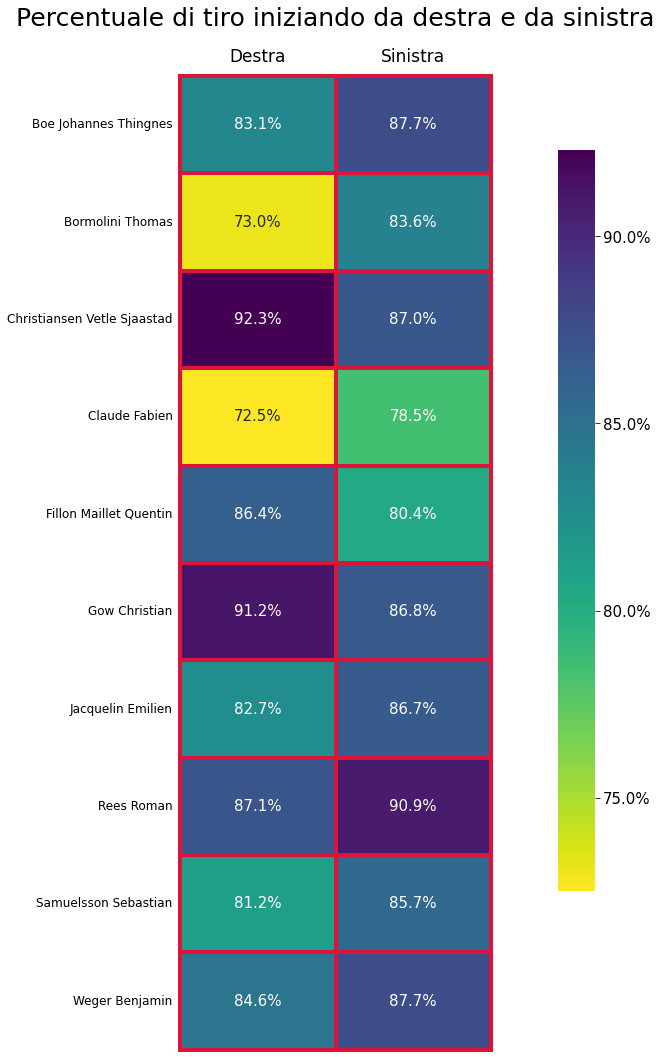

In [103]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(9, 15))
divider = make_axes_locatable(ax)

cax = divider.new_vertical(size = '5%', pad = 0.5)
sns_plot = sns.heatmap(heatmap_lr_men, cmap=matplotlib.cm.viridis.reversed(), annot=True, linewidths=3,
                 yticklabels=direction_men[np.in1d(direction_men['Name'], np.array(analyzed_dir_men))]['Name'],\
                     xticklabels=['Destra', 'Sinistra'], ax=ax, annot_kws={'fontsize':15}, \
                        cbar_kws={"orientation": "vertical", 'location':'right', 'shrink':0.7, 'pad':0.15,\
                            'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))}, fmt='.1%')

x, y, w, h = 0, _, 1, 1

c_bar = ax.collections[0].colorbar
c_bar.set_ticks([0.75, 0.8, 0.85, 0.9])

for i in range(10):
    ax.add_patch(Rectangle((x, i), w, h, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    ax.add_patch(Rectangle((x + 1, i), w, h, fill=False, edgecolor='crimson', lw=4, clip_on=False))

sns_plot.figure.axes[-1].tick_params(axis='y', which='major', labelsize=15, length=5)
ax.tick_params(axis='y', which='major', labelsize=12, length=0)
ax.tick_params(axis='x', which='major', labelsize=17, length=0, pad=10)
ax.xaxis.tick_top()
ax.set_title('Percentuale di tiro iniziando da destra e da sinistra', fontsize=25, pad = 50)

fig.tight_layout()

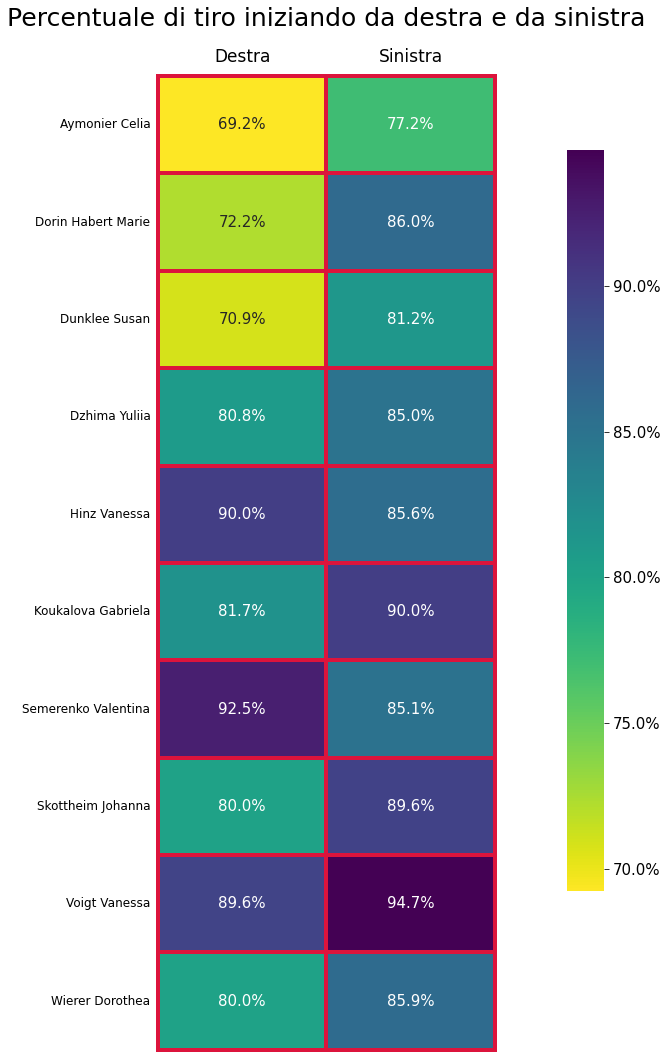

In [108]:

fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(9, 15))
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size = '5%', pad = 0.5)
sns_plot = sns.heatmap(heatmap_lr_women, cmap=matplotlib.cm.viridis.reversed(), annot=True, linewidths=3,
                 yticklabels=direction_women[np.in1d(direction_women['Name'], np.array(analyzed_dir_women))]['Name'],\
                     xticklabels=['Destra', 'Sinistra'], ax=ax, annot_kws={'fontsize':15}, \
                        cbar_kws={"orientation": "vertical", 'location':'right', 'shrink':0.7, 'pad':0.15,\
                             'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))}, fmt='.1%')

x, y, w, h = 0, _, 1, 1

for i in range(10):
    ax.add_patch(Rectangle((x, i), w, h, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    ax.add_patch(Rectangle((x + 1, i), w, h, fill=False, edgecolor='crimson', lw=4, clip_on=False))


ax.tick_params(axis='y', which='major', labelsize=12, length=0)
ax.tick_params(axis='x', which='major', labelsize=17, length=0, pad=10)
ax.xaxis.tick_top()

sns_plot.figure.axes[-1].tick_params(axis='y', which='major', labelsize=15, length=5)
ax.set_title('Percentuale di tiro iniziando da destra e da sinistra', fontsize=25, pad = 50)
fig.tight_layout()